In [1]:
import pandas as pd
import os

In [2]:
#경로설정 읽어오는 경로, 저장하는 경로
Path = os.path.join('Users','woosung','Gwang','Big_Data_Project','data')
Path2 = 'D:/Big_Data_Project/data'

In [3]:
df=pd.read_csv(f'{Path2}/preprocessed_data.csv')

In [4]:
#인구데이터를 면적으로 
df.drop(labels=["정원수","성비"],axis=1,inplace=True)
df.drop(14,axis=0,inplace=True)

In [5]:
df.columns

Index(['행정동', '사고건수', '신호등수', '무인교통단속카메라수량', 'CCTV수량', '범죄율평균', '어린이보호구역', '계',
       '인구수(남)', '인구수(여)', '지역(구성비)', '구성비(남)', '구성비(여)', '세대수', '세대당인구',
       '대중교통승객수', '공영주차장수', '공영주차장주차면수', '인구밀도 (명/㎢)', '총생활인구수', '도로'],
      dtype='object')

In [6]:
import seaborn as sns 
import matplotlib.pyplot as plt
from matplotlib import rc 

In [7]:
rc('font', family='AppleGothic') ## 이 두 줄을 
plt.rcParams['axes.unicode_minus'] = False  ## 추가해줍니다. 

In [8]:
df = df.set_index("행정동")

In [9]:
import numpy as np

In [10]:
df

,사고건수,신호등수,무인교통단속카메라수량,CCTV수량,범죄율평균,어린이보호구역,계,인구수(남),인구수(여),지역(구성비),구성비(남),구성비(여),세대수,세대당인구,대중교통승객수,공영주차장수,공영주차장주차면수,인구밀도 (명/㎢),총생활인구수,도로
행정동,,,,,,,,,,,,,,,,,,,,
광장동,284,8.0,3,264,3.6,9.0,34168,16524,17644,10.13,4.90,5.23,11814,2.89,551626.0,3.0,28.0,14377,36052.585890,244206.90
구의1동,204,3.0,2,281,1.4,3.0,23387,11143,12244,6.93,3.30,3.63,13077,1.79,897290.0,3.0,378.0,42945,24941.159033,97207.90
구의2동,204,4.0,3,330,1.4,9.0,26043,12511,13532,7.72,3.71,4.01,11517,2.26,665421.0,3.0,113.0,19117,21648.997242,240461.70
구의3동,204,16.0,8,275,3.6,6.0,28211,13309,14902,8.36,3.94,4.42,12079,2.34,1096968.0,6.0,524.0,27882,30926.011957,173951.00
군자동,273,5.0,6,308,3.0,8.0,19425,9603,9822,5.76,2.85,2.91,11400,1.70,256677.0,3.0,125.0,29086,22148.570882,170569.10
능동,134,0.0,4,209,3.0,2.0,11180,5134,6046,3.31,1.52,1.79,6406,1.75,1472471.0,3.0,179.0,10510,16506.987984,127697.30
자양1동,206,10.0,1,234,2.0,6.0,21862,10646,11216,6.48,3.16,3.32,11913,1.84,175664.0,1.0,24.0,39840,25014.111149,90290.50
자양2동,206,8.0,3,287,2.4,8.0,23946,11612,12334,7.10,3.44,3.66,10887,2.20,189395.0,2.0,570.0,14436,21081.833506,250035.20
자양3동,206,6.0,1,216,2.4,7.0,27553,13166,14387,8.17,3.90,4.26,11009,2.50,180485.0,3.0,196.0,23215,23498.113723,180581.00


***

# 누적 설명 분산 비율

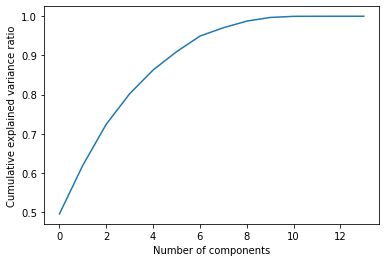

In [12]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# PCA 객체를 생성합니다.
pca = PCA()

# 주성분을 추출하기 전, 데이터를 StandardScaler를 사용하여 정규화합니다.
X_scaled = StandardScaler().fit_transform(df)

# 주성분 분석을 수행합니다.
pca.fit(X_scaled)

# 각 주성분이 설명하는 분산의 비율을 계산합니다.
explained_variance_ratio = pca.explained_variance_ratio_

# 누적 설명 분산을 계산합니다.
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# 누적 설명 분산 비율을 그래프로 나타냅니다.
plt.plot(cumulative_variance_ratio)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance ratio')
plt.show()

***

# 주성분 분석, 주성분 변환

Transformed data shape: (14, 4)
Transformed data:
 [[ 6.11484415  0.9960195  -2.1903402  -1.67208233]
 [-0.15017025 -1.31531702 -0.2486589   2.23478981]
 [ 1.68839461 -0.56148673  0.3643483  -1.15183187]
 [ 3.70595813  2.88204891  0.61353547  2.80452124]
 [-0.52261714  1.01536187 -0.77980974  0.62339951]]
Explained variance ratio: [0.49515722 0.12418328 0.10480406 0.07788003]


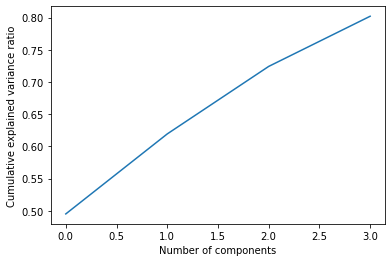

In [13]:
import matplotlib.pyplot as plt

# PCA 객체를 생성합니다.
pca = PCA(n_components=4)

# 주성분을 추출하기 전, 데이터를 StandardScaler를 사용하여 정규화합니다.
X_scaled = StandardScaler().fit_transform(df)

# 주성분 분석을 수행합니다.
pca.fit(X_scaled)

# 주성분 변환을 수행합니다.
X_pca = pca.transform(X_scaled)

# 변환된 데이터의 크기를 출력합니다.
print('Transformed data shape:', X_pca.shape)

# 변환된 데이터의 처음 5개 샘플을 출력합니다.
print('Transformed data:\n', X_pca[:5])

# 설명된 분산의 비율을 확인합니다.
explained_variance_ratio = pca.explained_variance_ratio_
print('Explained variance ratio:', explained_variance_ratio)

# 누적 설명 분산 비율을 계산합니다.
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# 누적 설명 분산 비율을 그래프로 나타냅니다.
plt.plot(cumulative_variance_ratio)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance ratio')
plt.show()

In [14]:
print(pca.components_)

[[ 0.19134183  0.20447152  0.04595085  0.14516721  0.11017474  0.14149074
   0.31225352  0.31340074  0.31005654  0.31228055  0.31340228  0.3100961
   0.25068974  0.26413242 -0.04159346  0.1397105   0.0449482  -0.0520633
   0.27325338  0.22185778]
 [ 0.13793207  0.06052079  0.47576896 -0.06673221  0.52631678  0.07426175
  -0.07764641 -0.08645303 -0.06919981 -0.07763193 -0.08643025 -0.06861494
  -0.24002989  0.06851071  0.44629792  0.03739932  0.18232159 -0.32528044
   0.12515023  0.09940915]
 [-0.38916387  0.09435897  0.03660446  0.40307259 -0.19115564 -0.23964779
  -0.03669682 -0.0324325  -0.04051713 -0.03683886 -0.03403703 -0.04041245
   0.04995641 -0.11419552  0.02014145  0.54015597  0.26517894 -0.26194961
  -0.13501791  0.32985188]
 [ 0.01527086  0.29916742  0.30639766  0.02771221 -0.01261375 -0.12548288
  -0.00785167 -0.02334594  0.00654184 -0.00820875 -0.02399452  0.00730519
   0.29685778 -0.26040178  0.17393985  0.10307227  0.36400716  0.58703229
   0.10479619 -0.33684446]]


pc1 : 인구수(남)(+),구성비(남)(+) -> 인구 관련 요인
pc2 : 무인교통단속카메라수량, 범죄율 평균 -> 교통/안전 관련 요인
pc3 : cctv수량, 공영주차장수 -> 교통/안전 관련 요인

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, 광장동 to 중곡4동
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   사고건수         14 non-null     int64  
 1   신호등수         14 non-null     float64
 2   무인교통단속카메라수량  14 non-null     int64  
 3   CCTV수량       14 non-null     int64  
 4   범죄율평균        14 non-null     float64
 5   어린이보호구역      14 non-null     float64
 6   계            14 non-null     int64  
 7   인구수(남)       14 non-null     int64  
 8   인구수(여)       14 non-null     int64  
 9   지역(구성비)      14 non-null     float64
 10  구성비(남)       14 non-null     float64
 11  구성비(여)       14 non-null     float64
 12  세대수          14 non-null     int64  
 13  세대당인구        14 non-null     float64
 14  대중교통승객수      14 non-null     float64
 15  공영주차장수       14 non-null     float64
 16  공영주차장주차면수    14 non-null     float64
 17  인구밀도 (명/㎢)   14 non-null     int64  
 18  총생활인구수       14 non-null     float64
 19  도로         

정원수빼기전
pca1 = 인구수(남)<양>,구성비(남)<양> -> 인구(남)관련 요인
pca2 = 사고건수<양>, 어린이집정원수<음>/생활인구수(양) -> 교통
pca3 = 범죄율평균<양>, 인구밀도<음> -> 범죄
pca4 = cctv수량<양>,공영주차장수<양> -> 교통+범죄
pca5 = 인구밀도<양>, 공영주차장면수<양> -> 교통
pca6 = 어린이보호구역<음>,공영주차장면수<양> -> 교통
정원수뺀후
pca1 = 인구수(남)<양>,구성비(남)<양> -> 인구(남)관련 요인
pca2 = 사고건수<양>,세대당인구<음> ->>>>>달라짐 
pca3 = 범죄율평균<양>, 인구밀도<음>
pca4 = cctv수량<양>,공영주차장수<양> -> 교통+범죄
pca5 = pca5 = 인구밀도<양>, 공영주차장면수<양> -> 교통
인구관련뺀후
pca1 = 범죄율, 총생활인구수
pca2 = 사고건수 공영주차장수, 공영주차장면수 
pca3 = 
pca4 =
pca5 =

***

# 엘부우 포인트 실루엣 계수 계산

In [16]:
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


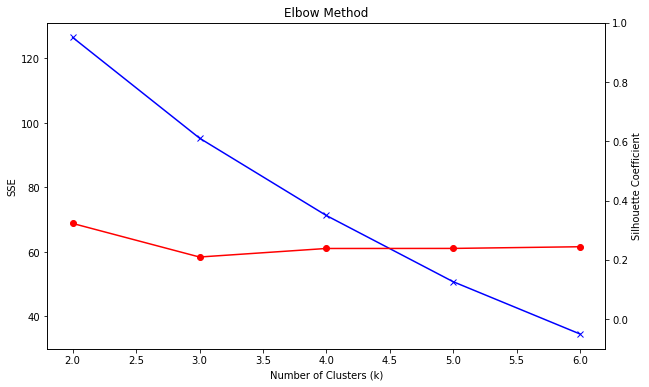

In [17]:
# 엘보우 포인트와 실루엣 계수를 저장할 리스트 초기화
sse = []
silhouette_coefficients = []

# 클러스터링을 위한 k 값 범위 설정
k_range = range(2, 7)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    sse.append(kmeans.inertia_)
    
    score = silhouette_score(X_pca, kmeans.labels_)
    silhouette_coefficients.append(score)

# 엘보우 포인트 그래프 그리기
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(k_range, sse, 'bx-')
ax.set_xlabel('Number of Clusters (k)')
ax.set_ylabel('SSE')
ax.set_title('Elbow Method')

# 실루엣 그래프 그리기
ax2 = ax.twinx()
ax2.plot(k_range, silhouette_coefficients, 'ro-')
ax2.set_ylabel('Silhouette Coefficient')
ax2.set_ylim([-0.1, 1])

plt.show()

***

# K-means

엘보우 포인터와 실루엣을 고려해서 n_clusters를 3으로 선정

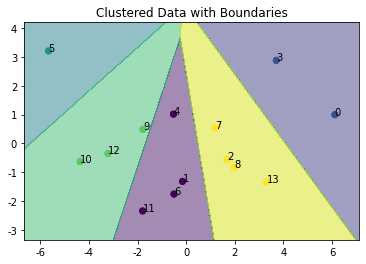

In [18]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Create a PCA object.
pca = PCA(n_components=2)

# Normalize data using StandardScaler before extracting principal components.
X_scaled = StandardScaler().fit_transform(df)

# Perform principal component analysis.
X_pca = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=5, init='random', algorithm='auto')
kmeans.fit(X_pca)

# Check the cluster label for each data
cluster_labels = kmeans.labels_

# Visualize clustering results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels)

# Define the range for the grid
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1

# Create a meshgrid of points
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict the cluster labels for each point on the grid
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the clustered data and the cluster boundaries
plt.contourf(xx, yy, Z, alpha=0.5)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels)
# Display index value on scatter plot
for i, point in enumerate(X_pca):
    plt.annotate(str(i), xy=point)
    
plt.title('Clustered Data with Boundaries')
plt.show()
# 1 3 4 4 2

In [19]:
print(pca.components_)

[[ 0.19134183  0.20447152  0.04595085  0.14516721  0.11017474  0.14149074
   0.31225352  0.31340074  0.31005654  0.31228055  0.31340228  0.3100961
   0.25068974  0.26413242 -0.04159346  0.1397105   0.0449482  -0.0520633
   0.27325338  0.22185778]
 [ 0.13793207  0.06052079  0.47576896 -0.06673221  0.52631678  0.07426175
  -0.07764641 -0.08645303 -0.06919981 -0.07763193 -0.08643025 -0.06861494
  -0.24002989  0.06851071  0.44629792  0.03739932  0.18232159 -0.32528044
   0.12515023  0.09940915]]


***

# GMM

In [20]:
from sklearn.mixture import GaussianMixture

n_components_range = range(1, 11)
aic_values = []
bic_values = []
for n_components in n_components_range:
    model = GaussianMixture(n_components=n_components, random_state=0)
    model.fit(df)  # X는 클러스터링할 데이터입니다.
    aic = model.aic(df)
    bic = model.bic(df)
    aic_values.append(aic)
    bic_values.append(bic)

print("AIC values:", aic_values)
print("BIC values:", bic_values)

c:\Users\lg\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


AIC values: [1772.8618066293097, 896.8753649541112, 159.42566075246327, 353.00493314393407, 742.1849440193737, 933.2669710402465, 1053.3606326308332, 956.7584239594817, 1348.063889450621, 1671.8393928694977]
BIC values: [1919.8449924408192, 1191.4807939067455, 601.6533328462222, 942.8548483788177, 1479.657102395382, 1818.3613725573796, 2086.077277289091, 2137.0973117588637, 2676.0250203911282, 3147.4227669511292]


k=3

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


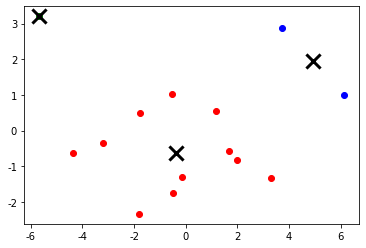

In [21]:
# gmm 모델 인스턴스화
gmm = GaussianMixture(n_components=3, random_state=42)

# 모델 학습
gmm.fit(X_pca)

# 클러스터 예측
centers = gmm.means_

labels = gmm.predict(X_pca)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_pca)

colors = ['red', 'blue', 'green', 'orange', 'purple']

for i in range(3):
    plt.scatter(pca_result[labels == i, 0], pca_result[labels == i, 1], color=colors[i])
plt.scatter(centers[:, 0], centers[:, 1], color='black', marker='x', s=200, linewidth=3)

# Chart settings
ax.set_title('KMedoids Clustering')
ax.legend()
plt.show()
# 1 11 2

***

# PAM기법

In [22]:
pip install scikit-learn-extra

^C
Note: you may need to restart the kernel to use updated packages.


In [23]:
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

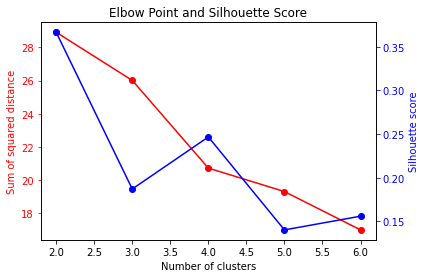

In [24]:
# k-medoids 알고리즘 적용
elbow_scores = []
silhouette_scores = []
for n_clusters in range(2, 7):
    kmedoids = KMedoids(n_clusters=n_clusters).fit(X_pca)
    elbow_scores.append(kmedoids.inertia_)
    silhouette_scores.append(silhouette_score(X_pca, kmedoids.labels_))

# 엘보우 포인트와 실루엣 값을 그래프에 시각화
fig, ax1 = plt.subplots()

# 엘보우 포인트 그래프
ax1.plot(range(2, 7), elbow_scores, 'o-', color='r')
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Sum of squared distance', color='r')
ax1.tick_params('y', colors='r')

# 실루엣 값 그래프
ax2 = ax1.twinx()
ax2.plot(range(2, 7), silhouette_scores, 'o-', color='b')
ax2.set_ylabel('Silhouette score', color='b')
ax2.tick_params('y', colors='b')

plt.title('Elbow Point and Silhouette Score')
plt.show()

n_cluseters = 4

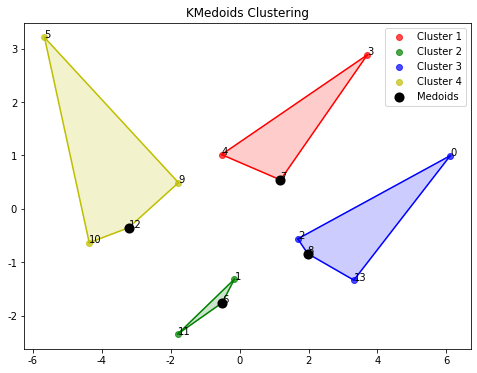

In [30]:
from scipy.spatial import ConvexHull

# Create and train KMedoids models
kmedoids = KMedoids(n_clusters=4, random_state=0)
y_kmedoids = kmedoids.fit_predict(X_pca)

# Define cluster colors
colors = ['r', 'g', 'b', 'y']

# Create subplots
fig, ax = plt.subplots(figsize=(8, 6))

# Plot each cluster with different color and label
for i in range(4):
    cluster_points = X_pca[y_kmedoids == i]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[i], alpha=0.7,
               label=f'Cluster {i+1}')
    # Get indices of outermost points in the cluster
    hull = ConvexHull(cluster_points)
    outermost_points_idx = hull.vertices
    # Plot lines connecting outermost points and fill interior space
    n_points = len(outermost_points_idx)
    
    for j in range(n_points):
        ax.plot([cluster_points[outermost_points_idx[j], 0], cluster_points[outermost_points_idx[(j+1)%n_points], 0]],
                [cluster_points[outermost_points_idx[j], 1], cluster_points[outermost_points_idx[(j+1)%n_points], 1]], color=colors[i])
    ax.fill(cluster_points[outermost_points_idx, 0], cluster_points[outermost_points_idx, 1], color=colors[i], alpha=0.2)

# Plot Medoids as black markers
medoids = kmedoids.cluster_centers_
ax.scatter(medoids[:, 0], medoids[:, 1], marker='o', s=50,
           linewidths=3, color='black', zorder=10, label='Medoids')


# Add point indices to the plot
for i, point in enumerate(X_pca):
    ax.annotate(str(i), xy=point)

# Set plot title and legend
ax.set_title('KMedoids Clustering')
ax.legend()

# Show the plot
plt.show()
# 4 3 3 4

***

In [ ]:
구의3동,자양1동,군자동 -> 후보군 선정